**IMPORTATION DES PACKAGES**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix , roc_auc_score
from tqdm import tqdm

**IMPORTATION DES DONNEES**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

DS = pd.read_csv(r"C:\Users\issad\Desktop\Base donn√©e m√©moire 3\Memoire Final\Mod√®le_DAO\Bank_Bon23.csv", sep=';')

In [43]:
DS.head(5) 

Age  Risque_du_secteur  freq_depots  freq_des_retraits  Lieux_de_residence  \
0   31                  0           19                 13                   1   
1    2                  1            8                  3                   1   
2   58                  0           18                  0                   1   
3   24                  0           13                 26                   0   
4   41                  0            7                  1                   0   

   Type_de_client  M_depot  M_retrait   M_recu  M_envoye  Z_t_recu  \
0               1   393411    6884485  4565541   8507601         0   
1               1  3289866    5865900  1583300   7041768         0   
2               0  6197348    3103942  9434881    910070         0   
3               0  5844268    1928525  4449115   6208713         0   
4               0   879409    2367918  5351429   7804008         0   

   Z_t_envoye  Blanchiment  
0           0            0  
1           0            0  
2           1            0  
3           0            0  
4           0            0

In [44]:
# les colonnes de caract√©ristiques (X) et la cible (y)

X = DS.drop('Blanchiment', axis=1)  # Toutes les colonnes sauf 'target'
y = DS['Blanchiment']  # La colonne cible

In [45]:
# Calculer la distribution des valeurs (en pourcentage)
taux = y.value_counts(normalize=True) * 100

# Afficher les r√©sultats
print(taux)

Blanchiment
0    96.208
1     3.792
Name: proportion, dtype: float64


In [46]:
def safe_to_numeric(series):
    try:
        return pd.to_numeric(series)
    except Exception:
        return series  # laisser tel quel si erreur

X = X.apply(safe_to_numeric)
y = y.apply(safe_to_numeric)

In [47]:
X.head(5)

Age  Risque_du_secteur  freq_depots  freq_des_retraits  Lieux_de_residence  \
0   31                  0           19                 13                   1   
1    2                  1            8                  3                   1   
2   58                  0           18                  0                   1   
3   24                  0           13                 26                   0   
4   41                  0            7                  1                   0   

   Type_de_client  M_depot  M_retrait   M_recu  M_envoye  Z_t_recu  Z_t_envoye  
0               1   393411    6884485  4565541   8507601         0           0  
1               1  3289866    5865900  1583300   7041768         0           0  
2               0  6197348    3103942  9434881    910070         0           1  
3               0  5844268    1928525  4449115   6208713         0           0  
4               0   879409    2367918  5351429   7804008         0           0

In [48]:
y .head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: Blanchiment, dtype: int64

In [49]:
# La division les donn√©es en ensembles d'entra√Ænement et de test (70% train, 30% test par d√©faut)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# V√©rifier les dimensions des sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 12) (30000, 12) (70000,) (30000,)


***Dans les donn√©es y_train nous avons 96,19 % de 0 soit non susceptible de Blanchir de l'argent et 3,81 % de 1 soit susceptible de Blanchir de l'argent***

In [50]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
total = len(y_train)

for value, count in zip(unique, counts):
    pourcentage = (count / total) * 100
    print(f"Valeur {value} : {pourcentage:.2f} %")


Valeur 0 : 96.22 %
Valeur 1 : 3.78 %


***Dans les donn√©es y_test nous avons 96,22 % de 0 soit non susceptible de Blanchir de l'argent et 3,78 % de 1 soit susceptible de Blanchir de l'argent***

In [51]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 12)
(70000,)
(30000, 12)
(30000,)


In [53]:
print(y_train.shape)
print(y_test.shape)

(70000,)
(30000,)


In [54]:
X_train = X_train.T
y_train = y_train.reshape((1, y_train.shape[0]))

In [55]:
print(X_train.shape)
print(y_train.shape)

(12, 70000)
(1, 70000)


In [56]:
X_test = X_test.T
y_test = y_test.reshape((1, y_test.shape[0]))

In [57]:
print(X_test.shape)
print(y_test.shape)

(12, 30000)
(1, 30000)


**Application du mod√®le a deux couches** 

# Fonctions

In [58]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [59]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    #A1  = 1 / (1 + np.clip(-Z1, -750, 750))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    #A2= 1 / (1 + np.clip(-Z2, -750, 750))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [60]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [61]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [62]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [63]:

def neural_network(X, y, n1=16, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])
        
        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Perte d''entra√Ænement')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Pr√©cision d''entra√Ænement')
    plt.legend()
    plt.show()

    return parametres

In [45]:
neural_network(X_train, y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
  0%|          | 1/1000 [00:00<05:57,  2.79it/s]C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
  0%|          | 2/1000 [00:00<05:46,  2.88it/s]C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
C:\Users\issad\AppData\Local\Temp\ipykernel_4860\1750279114.py:9: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
  0%|          | 3/1000 [00:01

KeyboardInterrupt: 







**Deuxieme parties:Application avec plusieurs couches**

**1. Initialisation**

In [64]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [65]:
parametres =  initialisation ([12,12,12,1])
for key, val in parametres.items():
    print(key,val.shape)

W1 (12, 12)
b1 (12, 1)
W2 (12, 12)
b2 (12, 1)
W3 (1, 12)
b3 (1, 1)


**2. Forward Propagation**

In [66]:
def forward_propagation(X_test, parametres):
  
  activations = {'A0': X_test}

  C = len(parametres) // 2

  for c in range(1, C + 1):

    Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
    #activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
    activations['A' + str(c)] = 1 / (1 + np.clip(-Z, -700, 700))
    
  return activations

In [67]:
activations = forward_propagation(X_test, parametres)
for key,val in activations.items():
    print(key,val.shape) 

A0 (12, 30000)
A1 (12, 30000)
A2 (12, 30000)
A3 (1, 30000)


**3. Back-Propagation**

In [68]:
def back_propagation(y_test, parametres, activations):

  m = y_test.shape[1]
  C = len(parametres) // 2

  dZ = activations['A' + str(C)] - y_test
  gradients = {}

  for c in reversed(range(1, C + 1)):
    gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
    gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
      dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

  return gradients

In [69]:
grad = back_propagation(y_test, parametres, activations)
for key, val in grad.items():
    print(key,val.shape)

dW3 (1, 12)
db3 (1, 1)
dW2 (12, 12)
db2 (12, 1)
dW1 (12, 12)
db1 (12, 1)


**4. Mise √† jour des param√®tres**

In [70]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [71]:
def predict(X_train, parametres):
    activations = forward_propagation(X_train, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    print(Af)
    return Af >= 0.5

In [110]:
def Apprentissage_profond_DAO(X_train, y_train, hidden_layers = (32, 32, 16), learning_rate = 0.02, n_iter = 700):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y_train.flatten(), Af.flatten()))
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = (accuracy_score(y_train.flatten(), y_pred.flatten()))


    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='Perte de l''entrainement')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='Pr√©cision de l''entrainement')
    plt.legend()
    plt.show()
    
    return training_history


In [111]:
Apprentissage_profond_DAO(X_train,y_train)

  0%|          | 1/700 [00:00<03:09,  3.68it/s]

[[-1.92533305 -1.92533305 -1.95436227 ... -1.94133001 -1.92533305
  -1.94133001]]


  0%|          | 2/700 [00:00<03:04,  3.78it/s]

[[-0.2213656  -0.2213656  -0.27748239 ... -0.27748239 -0.2213656
  -0.20489557]]


  0%|          | 3/700 [00:00<03:02,  3.82it/s]

[[-0.77261562 -0.98702514 -0.13086527 ... -0.77261562 -0.98702514
  -0.77261562]]


  1%|          | 4/700 [00:01<02:56,  3.94it/s]

[[-2.79000911 -2.78764072 -2.76954278 ... -2.76954278 -2.77197817
  -2.76954278]]


  1%|          | 5/700 [00:01<02:57,  3.91it/s]

[[-16.57757136  -5.21948824  31.75185487 ...  31.75185487  -4.79916927
   31.75185487]]


  1%|          | 6/700 [00:01<03:01,  3.83it/s]

[[-0.96888324 -0.96888324 -0.96439243 ... -0.96439243 -0.96439243
  -0.96439243]]


  1%|          | 7/700 [00:01<03:08,  3.67it/s]

[[-0.79686226 -0.79686226 -0.79148614 ... -0.79148614 -0.79148614
  -0.79148614]]


  1%|          | 8/700 [00:02<03:15,  3.54it/s]

[[-0.5858768 -0.5858768 -0.5786964 ... -0.5786964 -0.5786964 -0.5786964]]


  1%|‚ñè         | 9/700 [00:02<03:15,  3.54it/s]

[[0.10824147 0.12468563 0.04040126 ... 0.14828105 0.14828105 0.14828105]]


  1%|‚ñè         | 10/700 [00:02<03:17,  3.49it/s]

[[-1.46449841 -1.46449841 -0.10410556 ...  0.03385206 -1.30546883
  -1.46449841]]


  2%|‚ñè         | 11/700 [00:03<03:14,  3.55it/s]

[[-0.03023455 -0.03023455 -0.02287772 ... -0.04299985 -0.03023455
  -0.04299985]]


  2%|‚ñè         | 12/700 [00:03<03:19,  3.46it/s]

[[15.77093266 15.77093266 15.77093266 ... 15.77093266 15.77093266
  15.77093266]]


  2%|‚ñè         | 13/700 [00:03<03:16,  3.50it/s]

[[-0.4787484  -0.4787484  -0.48298723 ... -0.48298723 -0.48298723
  -0.4787484 ]]


  2%|‚ñè         | 14/700 [00:03<03:13,  3.55it/s]

[[-0.45384295 -0.45384295 -0.45750404 ... -0.45750404 -0.45750404
  -0.45384295]]


KeyboardInterrupt: 

In [112]:
def Apprentissage_profond_DAO(X_train, y_train, hidden_layers=(8, 8, 8), learning_rate=0.02, n_iter=700):
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from sklearn.metrics import accuracy_score, log_loss

    # Initialisation des param√®tres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # Tableau pour stocker loss et accuracy
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # Descente de gradient
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # Log Loss
        training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())

        # Accuracy
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())

    # Affichage courbes
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='Perte d\'entra√Ænement')
    plt.xlabel('It√©rations')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='Pr√©cision d\'entra√Ænement')
    plt.xlabel('It√©rations')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Affichage de la derni√®re pr√©cision
    final_accuracy = training_history[-1, 1]
    print(f"‚úÖ Pr√©cision finale du mod√®le : {final_accuracy:.4f}")

    return training_history


In [115]:
def Apprentissage_profond_DAO(X_train, y_train, hidden_layers=(32, 32, 16), learning_rate=0.02, n_iter=700):
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from sklearn.metrics import log_loss, accuracy_score

    # Initialisation des dimensions du r√©seau
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])

    np.random.seed(1)
    parametres = initialisation(dimensions)

    # Tableau pour stocker la loss et la pr√©cision
    training_history = np.zeros((int(n_iter), 2))
    C = len(parametres) // 2  # nombre de couches

    # Descente de gradient
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # Calcul du log_loss et de l'accuracy
        training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())

    # Affichage des courbes d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label="Perte d'entra√Ænement")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label="Pr√©cision d'entra√Ænement")
    plt.legend()
    plt.show()

    # Retourne les param√®tres appris (mod√®le) + l'historique
    return parametres, training_history


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 700/700 [02:38<00:00,  4.42it/s]


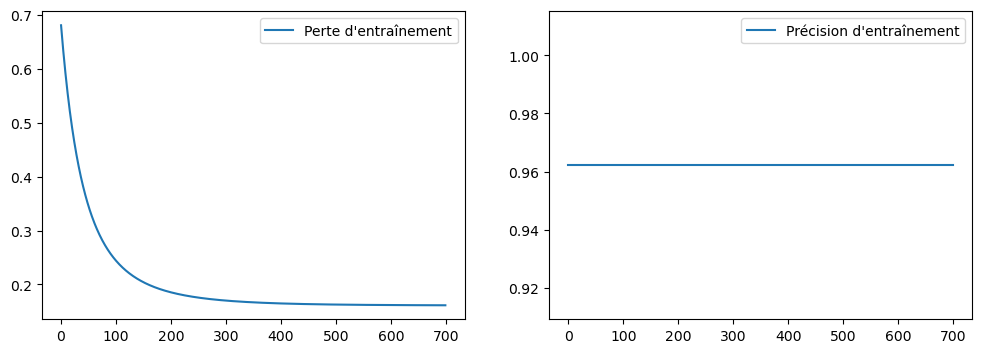

Pr√©cision finale: 0.9621714285714286


In [120]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

class neuroneDAOI:
    def __init__(self, input_size, hidden_layers=(32, 32, 16), output_size=1):
        """Initialisation du mod√®le"""
        self.dimensions = [input_size] + list(hidden_layers) + [output_size]
        self.parameters = self._initialize_parameters()
        self.training_history = None
    
    def _initialize_parameters(self):
        """Initialisation des param√®tres (poids et biais)"""
        parameters = {}
        np.random.seed(1)
        
        for c in range(1, len(self.dimensions)):
            parameters[f'W{c}'] = np.random.randn(self.dimensions[c], self.dimensions[c-1]) * 0.01
            parameters[f'b{c}'] = np.zeros((self.dimensions[c], 1))
            
        return parameters
    
    def forward_propagation(self, X):
        """Propagation avant"""
        activations = {'A0': X}
        C = len(self.parameters) // 2
        
        for c in range(1, C + 1):
            Z = np.dot(self.parameters[f'W{c}'], activations[f'A{c-1}']) + self.parameters[f'b{c}']
            activations[f'A{c}'] = 1 / (1 + np.exp(-np.clip(Z, -700, 700)))  # Sigmoid avec protection contre overflow
            
        return activations
    
    def back_propagation(self, X, y, activations):
        """R√©tropropagation du gradient"""
        m = y.shape[1]
        C = len(self.parameters) // 2
        gradients = {}
        
        # D√©riv√©e de la derni√®re couche
        dZ = activations[f'A{C}'] - y
        
        for c in reversed(range(1, C + 1)):
            gradients[f'dW{c}'] = (1/m) * np.dot(dZ, activations[f'A{c-1}'].T)
            gradients[f'db{c}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            
            if c > 1:
                dZ = np.dot(self.parameters[f'W{c}'].T, dZ) * activations[f'A{c-1}'] * (1 - activations[f'A{c-1}'])
                
        return gradients
    
    def update_parameters(self, gradients, learning_rate):
        """Mise √† jour des param√®tres"""
        C = len(self.parameters) // 2
        
        for c in range(1, C + 1):
            self.parameters[f'W{c}'] -= learning_rate * gradients[f'dW{c}']
            self.parameters[f'b{c}'] -= learning_rate * gradients[f'db{c}']
    
    def predict(self, X, threshold=0.5):
        """Pr√©diction"""
        activations = self.forward_propagation(X)
        C = len(self.parameters) // 2
        Af = activations[f'A{C}']
        return (Af >= threshold).astype(int)
    
    def compute_metrics(self, X, y):
        """Calcul des m√©triques (log loss et accuracy)"""
        activations = self.forward_propagation(X)
        C = len(self.parameters) // 2
        Af = activations[f'A{C}']
        
        loss = log_loss(y.flatten(), Af.flatten())
        accuracy = accuracy_score(y.flatten(), self.predict(X).flatten())
        
        return loss, accuracy
    
    def train(self, X_train, y_train, learning_rate=0.02, n_iter=700):
        """Entra√Ænement du mod√®le"""
        self.training_history = np.zeros((n_iter, 2))
        
        for i in tqdm(range(n_iter)):
            # Propagation avant
            activations = self.forward_propagation(X_train)
            
            # R√©tropropagation
            gradients = self.back_propagation(X_train, y_train, activations)
            
            # Mise √† jour des param√®tres
            self.update_parameters(gradients, learning_rate)
            
            # Calcul des m√©triques
            self.training_history[i, 0], self.training_history[i, 1] = self.compute_metrics(X_train, y_train)
        
        # Affichage des courbes d'apprentissage
        self.plot_training_history()
        
        return self.training_history
    
    def plot_training_history(self):
        """Visualisation des courbes d'apprentissage"""
        if self.training_history is None:
            raise ValueError("Le mod√®le n'a pas encore √©t√© entra√Æn√©")
            
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.training_history[:, 0], label='Perte d\'entra√Ænement')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(self.training_history[:, 1], label='Pr√©cision d\'entra√Ænement')
        plt.legend()
        plt.show()

# Exemple d'utilisation
if __name__ == "__main__":
    
    # Cr√©ation et entra√Ænement du mod√®le
    modelBONID = neuroneDAOI(input_size=12, hidden_layers=(8, 8), output_size=1)
    history = modelBONID.train(X_train, y_train, learning_rate=0.02, n_iter=700)
    
    # Pr√©diction
    predictions = modelBONID.predict(X_train)
    print("Pr√©cision finale:", accuracy_score(y_train.flatten(), predictions.flatten()))

In [121]:
modelBONID

In [122]:

    #modDAO = get_trained_model(X_test, y_test)
    predictions = modelBONID.predict(X_test)
    print(" Pr√©cision finale:", accuracy_score(y_test.flatten(), predictions.flatten()))

 Pr√©cision finale: 0.9618666666666666


In [82]:
#joblib.dump(modDAO, "modeleNEURONE.pkl")  # Enregistre dans un fichier

In [141]:
import joblib
# Sauvegarder le mod√®le dans un fichier
joblib.dump(modelBONID, 'modelePBBC.pkl')

['modelePBBC.pkl']

In [142]:
# Chargement du mod√®le
modeleCC = joblib.load("modelePBBC.pkl")

In [136]:
""""" ['Age', 'Risque_du_secteur', 'freq_depots', 'freq_des_retraits', 'Lieux_de_residence',
 'Type_de_client', 'M_depot', 'M_retrait', 'M_recu', 'M_envoye',
 'Z_t_recu', 'Z_t_envoye', 'Blanchiment'] """""


'"" [\'Age\', \'Risque_du_secteur\', \'freq_depots\', \'freq_des_retraits\', \'Lieux_de_residence\',\n \'Type_de_client\', \'M_depot\', \'M_retrait\', \'M_recu\', \'M_envoye\',\n \'Z_t_recu\', \'Z_t_envoye\', \'Blanchiment\'] '

In [137]:
import numpy as np

client_data = np.array([[16, 1, 20,13,0, 1,9000000,9000000,4000000,0,1 ,1]])
client_data = client_data.T

In [143]:
resultat = modeleCC. predict(client_data)
# Pour un DataFrame
#resultat = modele.predict(client_df)
resultat

array([[0]])

**Pour le premier finale**

In [ ]:
import customtkinter as ctk
import numpy as np
import random  # utilis√© pour la simulation
import tkinter.messagebox as messagebox

# Initialisation de customtkinter
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")

# Cr√©ation de la fen√™tre principale
root = ctk.CTk()
root.title("Analyse de Risque du Blanchiment de Capitaux d'un client")
root.geometry("600x700")

# Labels des variables
labels = [
    "√Çge", "Risque du secteur", "Fr√©quence des d√©p√¥ts", "Fr√©quence des retraits",
    "Lieu de r√©sidence", "Type de client", "Montant des d√©p√¥ts", "Montant des retraits",
    "Montant re√ßu", "Montant envoy√©", "Zone de transfert re√ßu", "Zone de transfert envoy√©"
]

# Stockage des entr√©es
entries = {}

# --- En-t√™tes ---
title_label = ctk.CTkLabel(
    root,
    text="LOGICIEL D'ANALYSE DE RISQUE D'UN CLIENT",
    font=("Arial", 20, "bold")
)
title_label.pack(pady=(10,0))

subtitle_label = ctk.CTkLabel(
    root, text="BLANCHIMENT D'ARGENT", font=("Arial", 14)
)
subtitle_label.pack(pady=(0,10))

# --- Description ---
description_frame = ctk.CTkFrame(root, corner_radius=10)
description_frame.pack(pady=10, fill="x", padx=20)
ctk.CTkLabel(
    description_frame,
    text="Entrez les informations du client pour √©valuer son risque :",
    font=("Arial", 12, "italic")
).pack(pady=10)

# --- Champs de saisie ---
data_frame = ctk.CTkFrame(root, corner_radius=10)
data_frame.pack(pady=10, padx=20, fill="both", expand=True)

for lbl in labels:
    row = ctk.CTkFrame(data_frame, corner_radius=10)
    row.pack(pady=5, fill="x", padx=10)
    ctk.CTkLabel(row, text=f"{lbl} :", font=("Arial", 12)).pack(side="left", padx=10)
    var = ctk.StringVar()
    ent = ctk.CTkEntry(row, textvariable=var, font=("Arial", 12), corner_radius=10)
    ent.pack(side="right", fill="x", expand=True, padx=10)
    entries[lbl] = ent

# --- Fonctions d‚Äôaction ---
def reinitialiser_champs(event=None):
    """Vide tous les champs (raccourci Ctrl+R)."""
    for ent in entries.values():
        ent.delete(0, "end")

def Apprentissage_profond(event=None):
    """Ex√©cute le mod√®le (raccourci Entr√©e)."""
    try:
        # R√©cup√©ration et conversion
        data = [int(entries[l].get()) for l in labels]
        DAO = np.array(data).reshape(-1,1)  # transpose si n√©cessaire
        
        resultat = modeleCC. predict(DAO)
        # Pour un DataFrame
        #resultat = modele.predict(client_df)
        resultat
        blanchiment = "Oui" if resultat = array([[1]]) else "Non"

        # Fen√™tre de r√©sultat
        win = ctk.CTkToplevel(root)
        win.title("R√©sultats")
        ctk.CTkLabel(
            win,
            text=f"Pourcentage de risque : {F:.2%}\nBlanchiment probable : {blanchiment}",
            font=("Arial", 14)
        ).pack(pady=20, padx=20)
        ctk.CTkButton(win, text="Fermer", command=win.destroy).pack(pady=(0,20))

    except ValueError:
        messagebox.showerror(
            "Erreur",
            "Veuillez entrer des valeurs num√©riques valides dans tous les champs."
        )

# --- Boutons ---
button_frame = ctk.CTkFrame(root, corner_radius=10)
button_frame.pack(pady=20)

btn_exec = ctk.CTkButton(
    button_frame,
    text="Ex√©cuter le mod√®le    (Entr√©e)",
    command= modele,
    width=200
)
btn_exec.pack(side="left", padx=10)

btn_reset = ctk.CTkButton(
    button_frame,
    text="R√©initialiser    (Ctrl+R)",
    command=reinitialiser_champs,
    fg_color="#FF3333", hover_color="#CC0000",
    width=200
)
btn_reset.pack(side="left", padx=10)

btn_close = ctk.CTkButton(
    root,
    text="Fermer    (√âchap)",
    command=root.destroy
)
btn_close.pack(pady=(0,20))

# --- Bindings clavier ---
root.bind("<Return>", Apprentissage_profond)
root.bind("<Escape>", lambda e: root.destroy())
root.bind("<Control-r>", reinitialiser_champs)

# --- Lancement de l‚Äôapplication ---
root.mainloop()


In [ ]:
# =======================
# üîπ IMPORTATIONS
# =======================
import customtkinter as ctk
import numpy as np
import random  # Pour d'√©ventuelles simulations
import tkinter.messagebox as messagebox

# =======================
# üîπ CONFIGURATION DE L'INTERFACE
# =======================
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")

# =======================
# üîπ FEN√äTRE PRINCIPALE
# =======================
root = ctk.CTk()
root.title("Analyse de Risque du Blanchiment de Capitaux d'un client")
root.geometry("600x700")

# =======================
# üîπ LISTE DES VARIABLES √Ä SAISIR
# =======================
labels = [
    "√Çge", "Risque du secteur", "Fr√©quence des d√©p√¥ts", "Fr√©quence des retraits",
    "Lieu de r√©sidence", "Type de client", "Montant des d√©p√¥ts", "Montant des retraits",
    "Montant re√ßu", "Montant envoy√©", "Zone de transfert re√ßu", "Zone de transfert envoy√©"
]
entries = {}  # Dictionnaire pour stocker les champs de saisie

# =======================
# üîπ TITRES PRINCIPAUX
# =======================
title_label = ctk.CTkLabel(root, text="LOGICIEL D'ANALYSE DE RISQUE D'UN CLIENT", font=("Arial", 20, "bold"))
title_label.pack(pady=(10, 0))

subtitle_label = ctk.CTkLabel(root, text="BLANCHIMENT D'ARGENT", font=("Arial", 14))
subtitle_label.pack(pady=(0, 10))

# =======================
# üîπ DESCRIPTION
# =======================
description_frame = ctk.CTkFrame(root, corner_radius=10)
description_frame.pack(pady=10, fill="x", padx=20)
ctk.CTkLabel(description_frame, text="Entrez les informations du client pour √©valuer son risque :", font=("Arial", 12, "italic")).pack(pady=10)

# =======================
# üîπ CHAMPS DE SAISIE
# =======================
data_frame = ctk.CTkFrame(root, corner_radius=10)
data_frame.pack(pady=10, padx=20, fill="both", expand=True)

for lbl in labels:
    row = ctk.CTkFrame(data_frame, corner_radius=10)
    row.pack(pady=5, fill="x", padx=10)
    ctk.CTkLabel(row, text=f"{lbl} :", font=("Arial", 12)).pack(side="left", padx=10)
    var = ctk.StringVar()
    ent = ctk.CTkEntry(row, textvariable=var, font=("Arial", 12), corner_radius=10)
    ent.pack(side="right", fill="x", expand=True, padx=10)
    entries[lbl] = ent

# =======================
# üîπ FONCTIONS UTILITAIRES
# =======================
def reinitialiser_champs(event=None):
    """Vide tous les champs de saisie."""
    for ent in entries.values():
        ent.delete(0, "end")

def Apprentissage_profond(event=None):
    """Applique le mod√®le et affiche le r√©sultat."""
    try:
        # R√©cup√©ration des donn√©es
        data = [float(entries[l].get()) for l in labels]  # conversion en float
        DAO = np.array(data).reshape(1, -1)  # 1 ligne, n colonnes
        
        # Pr√©diction avec le mod√®le charg√© (√† d√©finir avant dans votre script)
        resultat = modeleCC.predict(DAO)
        proba = modeleCC.predict_proba(DAO)[0][1]  # Probabilit√© que ce soit 1
        
        blanchiment = "Oui" if resultat[0] == 1 else "Non"

        # Fen√™tre de r√©sultat
        win = ctk.CTkToplevel(root)
        win.title("R√©sultats")
        ctk.CTkLabel(
            win,
            text=f"Probabilit√© de risque : {proba:.2%}\nBlanchiment probable : {blanchiment}",
            font=("Arial", 14)
        ).pack(pady=20, padx=20)
        ctk.CTkButton(win, text="Fermer", command=win.destroy).pack(pady=(0, 20))

    except ValueError:
        messagebox.showerror(
            "Erreur",
            "Veuillez entrer des valeurs num√©riques valides dans tous les champs."
        )

# =======================
# üîπ BOUTONS D‚ÄôACTION
# =======================
button_frame = ctk.CTkFrame(root, corner_radius=10)
button_frame.pack(pady=20)

btn_exec = ctk.CTkButton(
    button_frame,
    text="Ex√©cuter le mod√®le    (Entr√©e)",
    command=Apprentissage_profond,
    width=200
)
btn_exec.pack(side="left", padx=10)

btn_reset = ctk.CTkButton(
    button_frame,
    text="R√©initialiser    (Ctrl+R)",
    command=reinitialiser_champs,
    fg_color="#FF3333",
    hover_color="#CC0000",
    width=200
)
btn_reset.pack(side="left", padx=10)

btn_close = ctk.CTkButton(
    root,
    text="Fermer    (√âchap)",
    command=root.destroy
)
btn_close.pack(pady=(0, 20))

# =======================
# üîπ RACCOURCIS CLAVIER
# =======================
root.bind("<Return>", Apprentissage_profond)
root.bind("<Escape>", lambda e: root.destroy())
root.bind("<Control-r>", reinitialiser_champs)

# =======================
# üîπ LANCEMENT DE L‚ÄôAPPLICATION
# =======================
root.mainloop()

**Transformationn en un mod√®le**

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss

def initialisation(dimensions):
    parametres = {}
    C = len(dimensions) - 1  
    for c in range(1, C + 1):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c-1]) * 0.01
        parametres['b' + str(c)] = np.zeros((dimensions[c], 1))
    return parametres

def sigmoid(Z):
    Z = np.clip(Z, -700, 700)
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)

def forward_propagation(X, parametres):
    activations = {'A0': X.T}
    C = len(parametres) // 2
    for c in range(1, C + 1):
        W = parametres['W' + str(c)]
        b = parametres['b' + str(c)]
        A_prev = activations['A' + str(c-1)]
        Z = np.dot(W, A_prev) + b
        A = sigmoid(Z)
        activations['Z' + str(c)] = Z
        activations['A' + str(c)] = A
    return activations

def back_propagation(y, parametres, activations):
    gradients = {}
    m = y.shape[0]
    y = y.reshape(activations['A' + str(len(parametres)//2)].T.shape)
    
    C = len(parametres) // 2
    dA = activations['A' + str(C)] - y.T  
    for c in reversed(range(1, C + 1)):
        A_prev = activations['A' + str(c-1)]
        Z = activations['Z' + str(c)]
        A = activations['A' + str(c)]
        dZ = dA * sigmoid_derivative(A)
        dW = (1/m) * np.dot(dZ, A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        gradients["dW" + str(c)] = dW
        gradients["db" + str(c)] = db
        if c > 1:
            W = parametres['W' + str(c)]
            dA = np.dot(W.T, dZ)
    return gradients

def update(gradients, parametres, learning_rate):
    C = len(parametres) // 2
    for c in range(1, C + 1):
        parametres['W' + str(c)] -= learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] -= learning_rate * gradients['db' + str(c)]
    return parametres

def predict(self, X):
    # Si les donn√©es sont au format (n_samples, n_features), on les transpose
    if X.shape[0] > X.shape[1]:
        X = X.T  # devient (n_features, n_samples)

    y_pred = predict(X, self.parametres)  # r√©sultat: (1, n_samples) ou (1, N)
    
    # On retourne la sortie sous forme (n_samples, 1)
    return y_pred.T  

class ApprentissageProfondModel:
    def __init__(self, parametres):
        self.parametres = parametres

    def predict(self, X):
        if X.shape[0] > X.shape[1]:  # si les donn√©es sont sous forme (n_samples, n_features)
            X = X.T  # on transpose pour correspondre au mod√®le
        y_pred = predict(X, self.parametres)
        return y_pred.T 

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y.flatten(), y_pred.flatten())

def Apprentissage_profond_DAO(X_train, y_train, hidden_layers=(32, 32, 16), learning_rate=0.02, n_iter=1000):
    # initialisation param√®tres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[1])  
    dimensions.append(y_train.shape[1] if len(y_train.shape) > 1 else 1) 

    np.random.seed(1)
    parametres = initialisation(dimensions)
    
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())

   
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label="Perte")
    plt.title("Courbe de perte")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label="Pr√©cision")
    plt.title("Courbe de pr√©cision")
    plt.legend()
    plt.show()
    return ApprentissageProfondModel(parametres)


In [120]:
modDAO = ApprentissageProfondModel(parametres)

In [121]:
modDAO

In [125]:
modDAO.predict(X_test.T)
modDAO.score(X_test.T, y_test.T)

AttributeError: 'dict' object has no attribute 'shape'

**L'entrainement du Mod√®le**

In [215]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

#def Apprentissage_profond_DAO(X_train, y_train):
#    modDAO = Sequential()
#    modDAO.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
#    modDAO.add(Dense(1, activation='sigmoid'))
    
#    modDAO.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
#    return model  # <-- tu dois retourner le mod√®le, pas l'entrainer ici

**Tester le mod√®le**

**D√©ploiyement avec mlflow**

**https://moncoachdata.com/blog/comment-deployer-des-modeles-de-machine-learning-comme-un-pro/**

**√âtape 2 : Sauvegarder le mod√®le entra√Æn√©**

In [118]:
!pip install joblib

In [364]:
import joblib
# Sauvegarder le mod√®le dans un fichier
#joblib.dump(modDAO, 'modDAO.pkl')

**√âtape 3 : Choisir une strat√©gie de d√©ploiement**

Il existe plusieurs fa√ßons de d√©ployer un mod√®le de Machine Learning en production, en fonction de ton cas d‚Äôutilisation et de ton infrastructure.

**Voici quelques strat√©gies courantes :**

**D√©ploiement bas√© sur l‚ÄôAPI REST**
Le d√©ploiement de ton mod√®le en tant qu‚ÄôAPI REST permet √† d‚Äôautres applications ou syst√®mes d‚Äôenvoyer des requ√™tes HTTP √† ton mod√®le et d‚Äôobtenir des pr√©dictions en retour. Cela est utile pour les applications web, les applications mobiles et d‚Äôautres syst√®mes en ligne.

**Traitement par lots**
Dans le traitement par lots, le mod√®le est ex√©cut√© p√©riodiquement sur de grands ensembles de donn√©es (par exemple, tous les jours ou toutes les semaines) et produit des pr√©dictions qui sont stock√©es pour une utilisation ult√©rieure. Ce type de traitement est courant dans des secteurs tels que la finance et la sant√©, o√π les d√©cisions n‚Äôont pas besoin d‚Äô√™tre prises en temps r√©el.

**Donn√©es en continu**
Pour les pr√©dictions en temps r√©el sur des donn√©es arrivant en continu, les mod√®les peuvent √™tre d√©ploy√©s dans le cadre d‚Äôun pipeline de donn√©es en continu √† l‚Äôaide d‚Äôoutils tels qu‚ÄôApache Kafka ou Flink.

**√âtape 4 : D√©ployer le mod√®le en tant qu‚ÄôAPI REST**

L‚Äôapproche la plus courante consiste √† servir ton mod√®le en tant qu‚ÄôAPI REST √† l‚Äôaide d‚Äôun framework web l√©ger tel que Flask ou FastAPI.

**Exemple : D√©ploiement avec Flask**

**Cr√©er une application Flask**
Cr√©e d‚Äôabord un fichier Python (app.py) pour d√©finir l‚ÄôAPI et charger le mod√®le entra√Æn√©.

In [127]:
from flask import Flask, request, jsonify
import joblib

model = joblib.load('modelecharge.pkl')
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json() 
    prediction = model.predict([data['features']])
    return jsonify({'prediction': int(prediction[0])})
if __name__ == '__main__':
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'modelecharge.pkl'

**Ex√©cuter l‚Äôapplication Flask**
Pour ex√©cuter l‚Äôapplication Flask localement :

In [ ]:
python app.py

Tu peux maintenant envoyer des requ√™tes au point de terminaison de ton mod√®le √† l‚Äôadresse http://localhost:5000/predict et obtenir des pr√©dictions.

Exemple : Envoi d‚Äôune requ√™te POST pour une pr√©diction

Pour obtenir des pr√©dictions, tu peux envoyer une requ√™te POST avec des features au format JSON :

In [ ]:
curl -X POST http://localhost:5000/predict -H "Content-Type: application/json" -d '{"features": [5.1, 3.5, 1.4, 0.2]}'

**√âtape 5 : Conteneuriser l‚Äôapplication avec Docker**

Les conteneurs sont un moyen populaire de d√©ployer des mod√®les de Machine Learning, car ils assurent la coh√©rence entre les diff√©rents environnements (local, staging, production).

√âtapes de la mise en place d‚Äôun mod√®le Docker :

Installer Docker : Assure-toi que Docker est install√© sur ta machine.
Cr√©er un fichier Docker : Ce fichier d√©finit l‚Äôenvironnement dans lequel ton mod√®le s‚Äôex√©cutera.
**Voici un exemple de fichier Docker simple :**

In [ ]:
# Utiliser un runtime Python officiel comme image m√®re
!FROM python:3.9-slim
# D√©finir le r√©pertoire de travail
!WORKDIR /app
# Copier le contenu du r√©pertoire actuel dans le conteneur √† /app
!COPY . /app
# Installer les paquets n√©cessaires
!RUN pip install -r requirements.txt
# Rendre le port 5000 accessible au monde ext√©rieur √† ce conteneur
!EXPOSE 5000
# Ex√©cuter app.py au lancement du conteneur
!CMD ["python", "app.py"]

Construire l‚Äôimage Docker :

In [ ]:
!docker build -t ml-model-api 

In [ ]:
!Ex√©cuter le conteneur Docker :

In [ ]:
!docker run -p 5000:5000 ml-model-api

Ton mod√®le s‚Äôex√©cute maintenant dans un conteneur Docker et est accessible depuis n‚Äôimporte quel environnement prenant en charge Docker.

**√âtape 6 : D√©ployer vers une plateforme Cloud**

Une fois ton mod√®le conteneuris√©, l‚Äô√©tape suivante consiste √† le d√©ployer dans le cloud. Il existe plusieurs plateformes cloud pour d√©ployer des mod√®les de Machine Learning, telles que

AWS : Utilise AWS Elastic Beanstalk, AWS Lambda ou SageMaker.
Google Cloud : D√©ployer sur Google Cloud Run ou AI Platform.
Microsoft Azure : Utilise Azure ML ou App Service.
Par exemple, pour d√©ployer ton mod√®le conteneuris√© sur AWS Elastic Beanstalk :

Installer le CLI EB : le CLI AWS Elastic Beanstalk t‚Äôaide √† cr√©er et √† g√©rer ton application.

In [ ]:
!pip install awsebcli

Initialiser l‚Äôenvironnement EB:

In [ ]:
!eb init

D√©ployer l‚Äôapplication :

In [ ]:
!eb create ml-api-env

Acc√©der √† l‚Äôapplication : Une fois l‚Äôapplication d√©ploy√©e, AWS fournira une URL o√π l‚ÄôAPI de votre mod√®le sera h√©berg√©e.

**√âtape 7 : Contr√¥ler et mettre √† jour le mod√®le**

Le d√©ploiement n‚Äôest pas la fin du p√©riple. Apr√®s le d√©ploiement, tu dois surveiller ou monitorer les performances du mod√®le, g√©rer les probl√®mes de mise √† l‚Äô√©chelle et mettre p√©riodiquement le mod√®le √† jour lorsque de nouvelles donn√©es sont disponibles.

**Monitoring :** Utilise des outils de surveillance pour suivre les performances de ton mod√®le en production. Tu peux surveiller des param√®tres tels que la latence, le taux d‚Äôerreur et la d√©rive de la pr√©cision au fil du temps.
**Mise √† l‚Äô√©chelle (scaling) :** Si l‚Äôapplication doit g√©rer un grand nombre de demandes, des outils de mise √† l‚Äô√©chelle automatique comme Kubernetes ou AWS Auto Scaling peuvent aider √† g√©rer la charge.
**Versioning :** Maintiens le contr√¥le des versions de tes mod√®les. Des outils comme MLflow et DVC (Data Version Control) peuvent aider √† suivre les diff√©rentes versions de tes mod√®les, ce qui facilite le retour √† une version ant√©rieure si n√©cessaire.

Le d√©ploiement de mod√®les de Machine Learning √† partir de Jupyter Notebooks vers la production ne se limite pas √† l‚Äô√©criture de code : il s‚Äôagit de s‚Äôassurer que ton mod√®le est robuste, √©volutif et accessible.

En sauvegardant le mod√®le, en le servant via une API, en le conteneurisant avec Docker et en le d√©ployant sur le cloud, tu peux passer de l‚Äôexp√©rimentation √† une solution pr√™te pour la production.

Avec une surveillance et une maintenance appropri√©es, ton mod√®le de Machine Learning peut apporter une valeur r√©elle aux utilisateurs dans des environnements r√©els.

**HMM**

In [124]:
!pip install hmmlearn

In [21]:
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Normaliser les donn√©es si n√©cessaire
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialisation du mod√®le HMM 5 √©tats cach√©s)
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# Entra√Æner le mod√®le avec X_train
model.fit(X_train)

# Faire des pr√©dictions sur X_test
predictions = model.predict(X_test)

# Afficher les pr√©dictions et la performance
print("Pr√©dictions sur X_test:", predictions)
print("√âtiquettes r√©elles sur X_test:", y_test)

# Si vous souhaitez √©valuer la pr√©cision :
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Pr√©dictions sur X_test: [0 2 2 ... 0 0 2]
√âtiquettes r√©elles sur X_test: 35363    0
43649    0
60832    0
37399    0
61034    0
        ..
87507    0
22905    0
17212    0
7986     0
46435    0
Name: Blanchiment, Length: 30000, dtype: int64
Accuracy: 0.4791


**REGRESSION LOGISTIQUE**

In [19]:
##la regression logistique
# R√©gression logistique
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# √âvaluation de la r√©gression logistique
log_predictions = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, log_predictions)
print(f"Pr√©cision de la r√©gression logistique: {log_accuracy:.4f}")

Pr√©cision de la r√©gression logistique: 0.9570


C:\Users\issad\Anaconda3.13\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Mod√®le de r√©gression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Pr√©dictions
"""y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)

# Affichage des r√©sultats
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du mod√®le : {accuracy*100:.2f}%")

# Affichage des probabilit√©s pour chaque client
for i, p in enumerate(proba):
    print(f"Client {i+1} - Probabilit√© de risque : {p[1]*100:.2f} % (0 = non suspect, 1 = suspect)")


SyntaxError: incomplete input (1706837764.py, line 12)

In [106]:
!pip install customtkinter

In [108]:
import tkinter
import customtkinter
print(tkinter.TkVersion)


8.6


In [109]:
import tkinter as tk


**L'interface bon de dao issa**

In [2]:
import customtkinter as ctk
import numpy as np
import random  # utilis√© pour la simulation
import tkinter.messagebox as messagebox

# Initialisation de customtkinter
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")

# Cr√©ation de la fen√™tre principale
root = ctk.CTk()
root.title("Analyse de Risque du Blanchiment de Capitaux d'un client")
root.geometry("600x700")

# Labels des variables
labels = [
    "√Çge", "Risque du secteur", "Fr√©quence des d√©p√¥ts", "Fr√©quence des retraits",
    "Lieu de r√©sidence", "Type de client", "Montant des d√©p√¥ts", "Montant des retraits",
    "Montant re√ßu", "Montant envoy√©", "Zone de transfert re√ßu", "Zone de transfert envoy√©"
]

# Stockage des entr√©es
entries = {}

# --- En-t√™tes ---
title_label = ctk.CTkLabel(
    root,
    text="LOGICIEL D'ANALYSE DE RISQUE D'UN CLIENT OU DES CLIENTS DE LA BANQUE",
    font=("Arial", 20, "bold")
)
title_label.pack(pady=(10,0))

subtitle_label = ctk.CTkLabel(
    root, text="BLANCHIMENT D'ARGENT", font=("Arial", 14)
)
subtitle_label.pack(pady=(0,10))

# --- Description ---
description_frame = ctk.CTkFrame(root, corner_radius=10)
description_frame.pack(pady=10, fill="x", padx=20)
ctk.CTkLabel(
    description_frame,
    text="Entrez les informations du client pour √©valuer son risque :",
    font=("Arial", 12, "italic")
).pack(pady=10)

# --- Champs de saisie ---
data_frame = ctk.CTkFrame(root, corner_radius=10)
data_frame.pack(pady=10, padx=20, fill="both", expand=True)

for lbl in labels:
    row = ctk.CTkFrame(data_frame, corner_radius=10)
    row.pack(pady=5, fill="x", padx=10)
    ctk.CTkLabel(row, text=f"{lbl} :", font=("Arial", 12)).pack(side="left", padx=10)
    var = ctk.StringVar()
    ent = ctk.CTkEntry(row, textvariable=var, font=("Arial", 12), corner_radius=10)
    ent.pack(side="right", fill="x", expand=True, padx=10)
    entries[lbl] = ent

# --- Fonctions d‚Äôaction ---
def reinitialiser_champs(event=None):
    """Vide tous les champs (raccourci Ctrl+R)."""
    for ent in entries.values():
        ent.delete(0, "end")

def Apprentissage_profond(event=None):
    """Ex√©cute le mod√®le (raccourci Entr√©e)."""
    try:
        # R√©cup√©ration et conversion
        data = [int(entries[l].get()) for l in labels]
        DAO = np.array(data).reshape(-1,1)  # transpose si n√©cessaire

        # Simulation de sortie de mod√®le
        F = random.random()
        blanchiment = "Oui" if F > 0.6 else "Non"

        # Fen√™tre de r√©sultat
        win = ctk.CTkToplevel(root)
        win.title("R√©sultats")
        ctk.CTkLabel(
            win,
            text=f"Pourcentage de risque : {F:.2%}\nBlanchiment probable : {blanchiment}",
            font=("Arial", 14)
        ).pack(pady=20, padx=20)
        ctk.CTkButton(win, text="Fermer", command=win.destroy).pack(pady=(0,20))

    except ValueError:
        messagebox.showerror(
            "Erreur",
            "Veuillez entrer des valeurs num√©riques valides dans tous les champs."
        )

# --- Boutons ---
button_frame = ctk.CTkFrame(root, corner_radius=10)
button_frame.pack(pady=20)

btn_exec = ctk.CTkButton(
    button_frame,
    text="Ex√©cuter le mod√®le    (Entr√©e)",
    command=Apprentissage_profond,
    width=200
)
btn_exec.pack(side="left", padx=10)

btn_reset = ctk.CTkButton(
    button_frame,
    text="R√©initialiser    (Ctrl+R)",
    command=reinitialiser_champs,
    fg_color="#FF3333", hover_color="#CC0000",
    width=200
)
btn_reset.pack(side="left", padx=10)

btn_close = ctk.CTkButton(
    root,
    text="Fermer    (√âchap)",
    command=root.destroy
)
btn_close.pack(pady=(0,20))

# --- Bindings clavier ---
root.bind("<Return>", Apprentissage_profond)
root.bind("<Escape>", lambda e: root.destroy())
root.bind("<Control-r>", reinitialiser_champs)

# --- Lancement de l‚Äôapplication ---
root.mainloop()



**Mon teste 07/07/2025**

***Mise en ≈ìuvre avec SHAP :***

In [243]:
!pip install shap
!pip install lime
!pip uninstall torch torchvision torchaudio


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---

In [245]:
import shap

# Convertir X_train et X_test en tableaux numpy si ce n‚Äôest pas d√©j√† fait
X_train_array = X_train if isinstance(X_train, np.ndarray) else X_train.to_numpy()
X_test_array = X_test if isinstance(X_test, np.ndarray) else X_test.to_numpy()

# Cr√©er un explainer SHAP compatible avec tout mod√®le
explainer = shap.KernelExplainer(modDAO.predict, X_train_array)

# Calcul des valeurs SHAP sur X_test
shap_values = explainer.shap_values(X_test_array)

# Visualisation
shap.summary_plot(shap_values, X_test_array)

Provided model function fails when applied to the provided data set.


ValueError: shapes (12,12) and (70000,12) not aligned: 12 (dim 1) != 70000 (dim 0)

In [57]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=feature_names,
                                                   class_names=['Non blanchiment', 'Blanchiment'],
                                                   mode='classification')

# Explication pour une instance sp√©cifique
exp = explainer.explain_instance(X_test.iloc[0].values, ISSA.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

NameError: name 'feature_names' is not defined

In [157]:
import customtkinter as ctk
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import matplotlib.pyplot as plt


class DeepNeuralNetwork:
    def __init__(self, input_size, hidden_layers=(32, 32, 16), output_size=1):
        """Initialisation du mod√®le"""
        self.dimensions = [input_size] + list(hidden_layers) + [output_size]
        self.parameters = self._initialize_parameters()
        self.training_history = None
    
    def _initialize_parameters(self):
        """Initialisation des param√®tres"""
        parameters = {}
        np.random.seed(1)
        
        for c in range(1, len(self.dimensions)):
            parameters[f'W{c}'] = np.random.randn(self.dimensions[c], self.dimensions[c-1]) * 0.01
            parameters[f'b{c}'] = np.zeros((self.dimensions[c], 1))
            
        return parameters
    
    def forward_propagation(self, X):
        """Propagation avant"""
        activations = {'A0': X}
        C = len(self.parameters) // 2
        
        for c in range(1, C + 1):
            Z = np.dot(self.parameters[f'W{c}'], activations[f'A{c-1}']) + self.parameters[f'b{c}']
            activations[f'A{c}'] = 1 / (1 + np.exp(-np.clip(Z, -700, 700)))
            
        return activations
    
    def predict(self, X, threshold=0.5):
        """Pr√©diction"""
        activations = self.forward_propagation(X)
        C = len(self.parameters) // 2
        Af = activations[f'A{C}']
        return (Af >= threshold).astype(int)
    
    def train(self, X_train, y_train, learning_rate=0.02, n_iter=1000):
        """Entra√Ænement du mod√®le"""
        self.training_history = np.zeros((n_iter, 2))
        C = len(self.parameters) // 2
        
        for i in tqdm(range(n_iter)):
            # Propagation avant
            activations = self.forward_propagation(X_train)
            Af = activations[f'A{C}']
            
            # Retropropagation (version simplifi√©e)
            m = y_train.shape[1]
            dZ = Af - y_train
            gradients = {}
            
            for c in reversed(range(1, C + 1)):
                gradients[f'dW{c}'] = (1/m) * np.dot(dZ, activations[f'A{c-1}'].T)
                gradients[f'db{c}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
                
                if c > 1:
                    dZ = np.dot(self.parameters[f'W{c}'].T, dZ) * activations[f'A{c-1}'] * (1 - activations[f'A{c-1}'])
            
            # Mise √† jour des param√®tres
            for c in range(1, C + 1):
                self.parameters[f'W{c}'] -= learning_rate * gradients[f'dW{c}']
                self.parameters[f'b{c}'] -= learning_rate * gradients[f'db{c}']
            
            # Calcul des m√©triques
            self.training_history[i, 0] = log_loss(y_train.flatten(), Af.flatten())
            y_pred = self.predict(X_train)
            self.training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())
        
        return self.training_history


class RiskAnalysisApp:
    def __init__(self, root):
        self.root = root
        self.model = None
        self.setup_ui()
        self.load_model()
    
    def setup_ui(self):
        """Configuration de l'interface"""
        self.root.title("Analyse de Risque de Blanchiment")
        self.root.geometry("600x700")
        
        # [Le reste de votre code d'interface graphique...]
        # ... (conservez votre code existant pour les labels, entries, etc.)
        
        # Ajoutez ce bouton pour tester le mod√®le
        test_button = ctk.CTkButton(self.root, 
                                  text="Tester le mod√®le", 
                                  command=self.test_model)
        test_button.pack(pady=10)
    
    def load_model(self):
        
        input_size = 12  
        self.modDAO = DeepNeuralNetwork(input_size=input_size, 
                                     hidden_layers=(12, 12), 
                                     output_size=1)
        
        # Entra√Ænement (√† remplacer par votre vrai entra√Ænement)
        print("Entra√Ænement du mod√®le...")
        self.modDAO.train(X_train, y_train, n_iter=500)
        print("Mod√®le entra√Æn√©!")
    
    def test_model(self):
        """Teste le mod√®le et affiche la pr√©cision"""
        if self.model is None:
            print("Mod√®le non charg√©!")
            return
        
        # Pr√©diction et calcul de la pr√©cision
        predictions = self.modDAO.predict(X_test)
        acc = accuracy_score(y_test.flatten(), predictions.flatten())
        
        # Affichage dans une fen√™tre popup
        result_window = ctk.CTkToplevel(self.root)
        result_window.title("R√©sultats du test")
        ctk.CTkLabel(result_window, 
                    text=f"Pr√©cision du mod√®le: {acc:.2%}", 
                    font=("Arial", 14)).pack(pady=20)
        ctk.CTkButton(result_window, 
                     text="Fermer", 
                     command=result_window.destroy).pack(pady=10)
    if __name__ == "__main__":
        root = ctk.CTk()
        app = RiskAnalysisApp(root)
        root.mainloop()

NameError: name 'RiskAnalysisApp' is not defined